# PA004 - HEALTH INSURANCE CROSS-SELL

## 0- IMPORTS

In [72]:
import os

import pandas          as pd
import numpy           as np
import pandas.io.sql   as psql
import psycopg2        as pg
import sweetviz        as sv
import plotly.express  as px
import seaborn         as sns

from matplotlib        import pyplot     as plt
pd.set_option('display.float_format', lambda x: '%.3f' %x) # Configuração das casas decimais

## 2 - DATAS

#### Schema Query

In [2]:
# VERIFICANDO SCHEMAS DO BANCO DE DADOS
#query_schema = """
#    SELECT nspname
#    FROM pg_catalog.pg_namespace
#"""
#cur.execute( query_schema )
#
#record = cur.fetchall()
#print(record)

#### Table Query

In [3]:
# VERIFICANDO TABELAS BANCO DE DADOS
#query_table = """
#    SELECT tablename
#    FROM pg_tables
#    WHERE schemaname='pa004'
#"""
#
#cur.execute( query_table )
#
#record = cur.fetchall()
#print(record)

#### Colecting Datas from DataBase using Pandas

In [4]:
#query_all_datas = """
#    SELECT *
#    FROM pa004.users u
#    INNER JOIN pa004.vehicle v ON ( u.id = v.id )
#    INNER JOIN pa004.insurance i ON (u.id = i.id )
#"""
#df_raw = pd.read_sql( query_all_datas, conn )
#cur.close()
#conn.close()

### 2.1 - Os dados foram coletados, limpos e salvos localmente, portando as credenciais de acesso ao banco de dados não estou disponíveis neste notebook.

In [5]:
# Salvando os dados coletados em csv na minha máquina
#os.makedirs('/home/reng/Documents/ds_repos/projects/Health_Insurance_Cross_Sell/data', exist_ok=True) #Criando pasta
#df2.to_csv('/home/reng/Documents/ds_repos/projects/Health_Insurance_Cross_Sell/data/data.csv')# Salvando os dados coletados em csv na minha máquina

In [6]:
# Carregando os dados salvos
df = pd.read_csv('/home/reng/Documents/ds_repos/projects/Health_Insurance_Cross_Sell/data/data.csv')

### 2.2 - Data Description

In [7]:
df1 = df.copy()

In [8]:
df1.head()

,Unnamed: 0,id,gender,age,region_code,policy_sales_channel,driving_license,vehicle_age,vehicle_damage,previously_insured,annual_premium,vintage,response
0,0,7,Male,23,11.000,152.000,1,< 1 Year,Yes,0,23367.000,249,0
1,1,13,Female,41,15.000,14.000,1,1-2 Year,No,1,31409.000,221,0
2,2,18,Female,25,35.000,152.000,1,< 1 Year,No,1,46622.000,299,0
3,3,31,Female,26,8.000,160.000,1,< 1 Year,No,0,2630.000,136,0
4,4,39,Male,45,8.000,124.000,1,1-2 Year,Yes,0,42297.000,264,0


In [9]:
df1.drop('Unnamed: 0', axis=1, inplace=True)

### 2.3 - Size of Dataset

In [10]:
df1.shape

(381109, 12)

### 2.4 - Check Data Types

In [11]:
df1.dtypes

id                        int64
gender                   object
age                       int64
region_code             float64
policy_sales_channel    float64
driving_license           int64
vehicle_age              object
vehicle_damage           object
previously_insured        int64
annual_premium          float64
vintage                   int64
response                  int64
dtype: object

### 2.5 - Check NA Datas

In [12]:
df1.isna().sum()

id                      0
gender                  0
age                     0
region_code             0
policy_sales_channel    0
driving_license         0
vehicle_age             0
vehicle_damage          0
previously_insured      0
annual_premium          0
vintage                 0
response                0
dtype: int64

In [13]:
df1.shape

(381109, 12)

### 2.6 - Removing Duplicated Columns

In [14]:
df1.head()

,id,gender,age,region_code,policy_sales_channel,driving_license,vehicle_age,vehicle_damage,previously_insured,annual_premium,vintage,response
0,7,Male,23,11.000,152.000,1,< 1 Year,Yes,0,23367.000,249,0
1,13,Female,41,15.000,14.000,1,1-2 Year,No,1,31409.000,221,0
2,18,Female,25,35.000,152.000,1,< 1 Year,No,1,46622.000,299,0
3,31,Female,26,8.000,160.000,1,< 1 Year,No,0,2630.000,136,0
4,39,Male,45,8.000,124.000,1,1-2 Year,Yes,0,42297.000,264,0


In [15]:
df1 = df1.loc[ :,~df1.columns.duplicated() ]

In [16]:
df1.shape

(381109, 12)

### 2.7 - Descriptive Statisctical

In [17]:
df1['vehicle_age'].unique()

array(['< 1 Year', '1-2 Year', '> 2 Years'], dtype=object)

In [18]:
num_attributes = df1.select_dtypes( include=[ 'int32', 'int64', 'float64' ] )
cat_attributes = df1.select_dtypes( exclude=[ 'object'] )

In [19]:
num_attributes

,id,age,region_code,policy_sales_channel,driving_license,previously_insured,annual_premium,vintage,response
0,7,23,11.000,152.000,1,0,23367.000,249,0
1,13,41,15.000,14.000,1,1,31409.000,221,0
2,18,25,35.000,152.000,1,1,46622.000,299,0
3,31,26,8.000,160.000,1,0,2630.000,136,0
4,39,45,8.000,124.000,1,0,42297.000,264,0
...,...,...,...,...,...,...,...,...,...
381104,381070,24,8.000,152.000,1,1,38254.000,127,0
381105,381079,58,28.000,26.000,1,0,39740.000,170,0
381106,381082,75,28.000,26.000,1,1,51619.000,80,0
381107,381097,49,10.000,26.000,1,0,34541.000,44,0


In [20]:
# Central Tendency - mean, median
ct1 = pd.DataFrame( num_attributes.apply( np.mean ) ).T
ct2 = pd.DataFrame( num_attributes.apply( np.median ) ).T

# Dispersion - std, min, max, range, skew, kurtosis
d1 = pd.DataFrame( num_attributes.apply( np.std ) ).T
d2 = pd.DataFrame( num_attributes.apply( min ) ).T
d3 = pd.DataFrame( num_attributes.apply( max ) ).T
d4 = pd.DataFrame( num_attributes.apply( lambda x: x.max() - x.min() ) ).T
d5 = pd.DataFrame( num_attributes.apply( lambda x: x.skew() ) ).T
d6 = pd.DataFrame( num_attributes.apply( lambda x: x.kurtosis() ) ).T

# Concatenar
m = pd.concat( [ d2, d3, d4, ct1, ct2, d1, d5, d6 ] ).T.reset_index()
m.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,id,1.000,381109.000,381108.000,190555.000,190555.000,110016.692,-0.000,-1.200
1,age,20.000,85.000,65.000,38.823,36.000,15.512,0.673,-0.566
2,region_code,0.000,52.000,52.000,26.389,28.000,13.230,-0.115,-0.868
3,policy_sales_channel,1.000,163.000,162.000,112.034,133.000,54.204,-0.900,-0.971
4,driving_license,0.000,1.000,1.000,0.998,1.000,0.046,-21.595,464.354
5,previously_insured,0.000,1.000,1.000,0.458,0.000,0.498,0.168,-1.972
6,annual_premium,2630.000,540165.000,537535.000,30564.390,31669.000,17213.132,1.766,34.005
7,vintage,10.000,299.000,289.000,154.347,154.000,83.671,0.003,-1.201
8,response,0.000,1.000,1.000,0.123,0.000,0.328,2.302,3.299


## 3 - FEATURE ENGINEERING

In [21]:
df2 = df1.copy()

In [22]:
df2.head()

,id,gender,age,region_code,policy_sales_channel,driving_license,vehicle_age,vehicle_damage,previously_insured,annual_premium,vintage,response
0,7,Male,23,11.000,152.000,1,< 1 Year,Yes,0,23367.000,249,0
1,13,Female,41,15.000,14.000,1,1-2 Year,No,1,31409.000,221,0
2,18,Female,25,35.000,152.000,1,< 1 Year,No,1,46622.000,299,0
3,31,Female,26,8.000,160.000,1,< 1 Year,No,0,2630.000,136,0
4,39,Male,45,8.000,124.000,1,1-2 Year,Yes,0,42297.000,264,0


In [23]:
# Ajustando coluna vehicle_age

df2['vehicle_age'] = df2['vehicle_age'].apply(lambda x: 'new' if (x == '< 1 Year') else
                                                        'used' if (x == '1-2 Year') else
                                                        'old')

### Business Hypothesis Validation

In [24]:
# 1. [GENDER] O percentual de homens que ja tiveram seu veiculo danificado é 30% maior do que o percentual de mulheres que já tiveram o carro danificado.

damage = df2[df2['vehicle_damage'] == 'Yes']
damage = damage[['gender','vehicle_damage']].groupby('gender').count().reset_index()
damage['percentual'] = damage['vehicle_damage']/damage['vehicle_damage'].sum()*100
damage

,gender,vehicle_damage,percentual
0,Female,79665,41.403
1,Male,112748,58.597


In [25]:
# 2. [GENDER] Os clientes homens são, na média, 5 anos mais velhos que clientes mulheres.
df2[['gender','age']].groupby('gender').mean().reset_index()

,gender,age
0,Female,36.373
1,Male,40.903


In [26]:
# 3. [GENDER] Mulheres mais velhas tem carros mais novos.
hypo_3 = df2[df2['gender'] =='Female']
hypo_3[['age','vehicle_age']].groupby('vehicle_age').mean().reset_index()

,vehicle_age,age
0,new,24.712
1,old,55.278
2,used,48.643


In [27]:
# 4. [GENDER] Mulheres tem maior interesse em adquirir seguro de automóveis.
df2[['gender','response','id']].groupby(['gender','response']).count().reset_index()

,gender,response,id
0,Female,0,156835
1,Female,1,18185
2,Male,0,177564
3,Male,1,28525


In [28]:
# 5. [GENDER] O percentual de clientes sem carteira de motorista é maior em relação as mulheres do que em relação aos homens.
df2[['gender','driving_license','id']].groupby(['gender','driving_license']).count().reset_index()

,gender,driving_license,id
0,Female,0,212
1,Female,1,174808
2,Male,0,600
3,Male,1,205489


In [29]:
# 6. [AGE] Todos cliente com idade maior que 55 anos gostariam de adquirir seguro veicular.
hypo_6 = df2[(df2['age'] > 55)]

hypo_6[['response','id']].groupby('response').count().reset_index()

,response,id
0,0,55066
1,1,7150


In [30]:
# 7. [AGE] Clientes acima de 35 anos pagam 20% menos do que clientes com idade inferior.
one = df2[df2['age'] > 35]['annual_premium'].mean()
two = df2[df2['age'] < 35]['annual_premium'].mean()

print(one, two)
result = (one/two - 1 ) * 100
result

31423.41776764438 29743.007972464755


5.649764128548473

In [31]:
# 8. [AGE] 15% das pessoas com menos de 50 anos tem interesse em adquirir seguro.
q8 = df2[(df2['age']<=50)]
one = q8['id'].count()
two = q8[q8['response'] == 1]['id'].count()
result = (two/one)*100
result

11.896501632115939

In [32]:
# 9. [AGE] 80% dos clientes com menos de 25 anos não tem interesse em adquirir seguro.
q9 = df2[(df2['age']<=25)]
one = q9['id'].count() 
two = q9[q9['response'] == 0]['id'].count()
result = (two/one)*100
result

96.46565652154928

In [33]:
# 10. [VEHICLE DAMAGE] 70% dos clientes que ja danificaram seu carro tem menos de 30 anos.
q10 = df2[(df2['vehicle_damage']=='Yes')]
one = q10[q10['age']<= 30]['id'].count()
two = q10['id'].count()
result = (one/two)*100
result

25.598062500974468

In [34]:
# 11. [VEHICLE DAMAGE] 25% das pessoas que já danificaram seu carro antes pretendem assinar seguro de automovel.
q11 = df2[(df2['vehicle_damage']=='Yes')]
one = q11[q11['response'] == 1]['id'].count()
two = q11['id'].count()
result = (one/two)*100
result

23.765545987017507

In [35]:
# 12. [VEHICLE DAMAGE] Clientes que danificaram seu veiculo representam 40% da base de dados.
one = df2[df2['vehicle_damage'] == 'No']['id'].count()
two = df2['id'].count()
result = (one/two)*100
result

49.51234423747537

In [36]:
# 13. [VEHICLE DAMAGE] 30% dos carros mais antigos ja foram danificados antes.
q13 = df2[(df2['vehicle_age']=='used')]
one = q13[q13['vehicle_damage']=='Yes']['id'].count()
two = df2['id'].count()
result = (one/two)*100 
result

33.64523010477318

In [37]:
# 14. [VEHICLE DAMAGE] 70% dos carros danificados tem interesse em fechar seguro.
q14 = df2[(df2['vehicle_damage']=='Yes')]
one = q14[q14['response']==1]['id'].count()
two = q14['id'].count()
result = (one/two)*100 
result

23.765545987017507

In [38]:
#15. [DRIVING LICENSE] 5% dos clientes sem licença para dirigir tem interesse no seguro de automóvel.
q15 = df2[(df2['driving_license'] == 0 )]
one = q15[q15['response']==1]['id'].count()
two = q15['id'].count()
result = (one/two)*100
result

5.0492610837438425

In [39]:
#16. [DRIVING LICENSE] Clientes com licença pagam mais.
df2[['driving_license','annual_premium']].groupby('driving_license').mean().reset_index()

,driving_license,annual_premium
0,0,34999.728
1,1,30554.919


<BarContainer object of 3 artists>

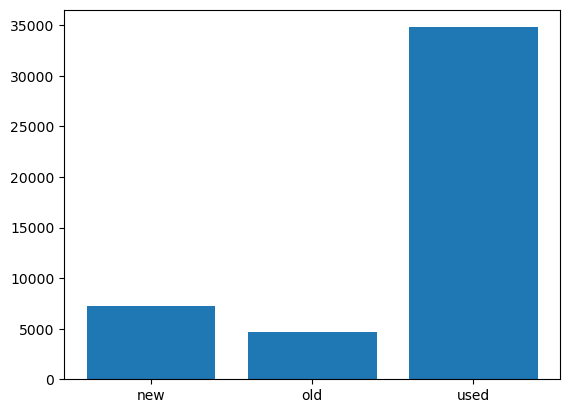

In [40]:
#17. [VEHICLE AGE] Quanto mais velho o veículo, menor o interesse em assinar seguro automóvel.
df17 = df2[(df2['response']==1)]
q17 = df17[['vehicle_age','id']].groupby('vehicle_age').count().reset_index()
plt.bar(q17['vehicle_age'],q17['id'])

In [49]:
#18. [DRIVER LICENSE] Pessoas sem carteira de motorista pagam 25% mais.
q18 = df2[['driving_license','annual_premium']].groupby('driving_license').mean().reset_index()


fig = px.bar(q18, x='driving_license', y='annual_premium', color='annual_premium', text='annual_premium', height=450)
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(title_text="Pessoas sem carteira de motorista pagam 25% mais.", title_x=0.45)
fig.show()

In [50]:
#19. [VEHICLE_DAMAGE] Clientes que já danificaram o carro, pagam 5% mais.
q19 = df2[['vehicle_damage','annual_premium']].groupby('vehicle_damage').mean().reset_index()


fig = px.bar(q19, x='vehicle_damage', y='annual_premium', color='annual_premium', text='annual_premium', height=450)
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(title_text="Clientes que já danificaram o carro, pagam mais.", title_x=0.45)
fig.show()

In [68]:
#20. [VINTAGE] Clientes mais antigos pagam 10% menos.
df2.head()

,id,gender,age,region_code,policy_sales_channel,driving_license,vehicle_age,vehicle_damage,previously_insured,annual_premium,vintage,response
0,7,Male,23,11.000,152.000,1,new,Yes,0,23367.000,"(240.0, 270.0]",0
1,13,Female,41,15.000,14.000,1,used,No,1,31409.000,"(210.0, 240.0]",0
2,18,Female,25,35.000,152.000,1,new,No,1,46622.000,NaN,0
3,31,Female,26,8.000,160.000,1,new,No,0,2630.000,"(120.0, 150.0]",0
4,39,Male,45,8.000,124.000,1,used,Yes,0,42297.000,"(240.0, 270.0]",0


In [81]:
#q19 = df2[['vintage','annual_premium']].groupby('vehicle_damage').mean().reset_index()

bins = list( np.arange(0, 299, 30) )
#df2['vintage_culture'] = pd.cut( df2['vintage'], bins=bins )
aux2 = df2[['vintage','annual_premium']].groupby('vintage').mean().reset_index()
aux2

,vintage,annual_premium
0,"(0, 30]",30656.243
1,"(30, 60]",30663.915
2,"(60, 90]",30459.968
3,"(90, 120]",30532.081
4,"(120, 150]",30611.014
5,"(150, 180]",30519.139
6,"(180, 210]",30543.935
7,"(210, 240]",30482.047
8,"(240, 270]",30623.599
